# **Setup**

* https://www.youtube.com/watch?v=R67XuYc9NQ4&t=1s
* https://www.kaggle.com/code/robikscube/economic-analysis-with-pandas-youtube-tutorial/input
* https://fred.stlouisfed.org/

In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import clear_output

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred
# fred_key = "API_Key"
fred_key = "e9d5b5445a740718e5f8f4a176b01dd9"

# **Data Import**

## **Setup Data Source**

In [9]:
data_source = Fred(api_key=fred_key)
data_source

## **Search Data**

In [14]:
data_source.search('S&P').head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-11-20,2023-11-20,S&P 500,2013-11-18,2023-11-17,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-17 19:13:19-06:00,83,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2023-11-20,2023-11-20,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2023-11-16,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-17 08:36:05-06:00,52,"Copyright, 2016, Chicago Board Options Exchang..."
CSUSHPINSA,CSUSHPINSA,2023-11-20,2023-11-20,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2023-11-20,2023-11-20,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-10-31 08:12:02-05:00,78,"For more information regarding the index, plea..."
VXOCLS,VXOCLS,2023-11-20,2023-11-20,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,24,This series is no longer being updated by the ...


In [15]:
# Get Search Results As Dataframe
Search_01 = data_source.search('S&P',order_by='popularity')
print(Search_01.shape)
Search_01.head()

(1000, 15)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-11-20,2023-11-20,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-16,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-17 09:05:01-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-11-20,2023-11-20,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2023-11-20,2023-11-20,S&P 500,2013-11-18,2023-11-17,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-17 19:13:19-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-11-20,2023-11-20,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-16,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-17 09:05:06-06:00,82,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-11-20,2023-11-20,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


## **Get Data**

In [16]:
Search_01.columns

Index(['id', 'realtime_start', 'realtime_end', 'title', 'observation_start',
       'observation_end', 'frequency', 'frequency_short', 'units',
       'units_short', 'seasonal_adjustment', 'seasonal_adjustment_short',
       'last_updated', 'popularity', 'notes'],
      dtype='object')

In [18]:
SP500_Data = data_source.get_series(series_id='SP500')
SP500_Data

2013-11-18    1791.53
2013-11-19    1787.87
2013-11-20    1781.37
2013-11-21    1795.85
2013-11-22    1804.76
               ...   
2023-11-13    4411.55
2023-11-14    4495.70
2023-11-15    4502.88
2023-11-16    4508.24
2023-11-17    4514.02
Length: 2610, dtype: float64

<Axes: title={'center': 'S&P 500'}>

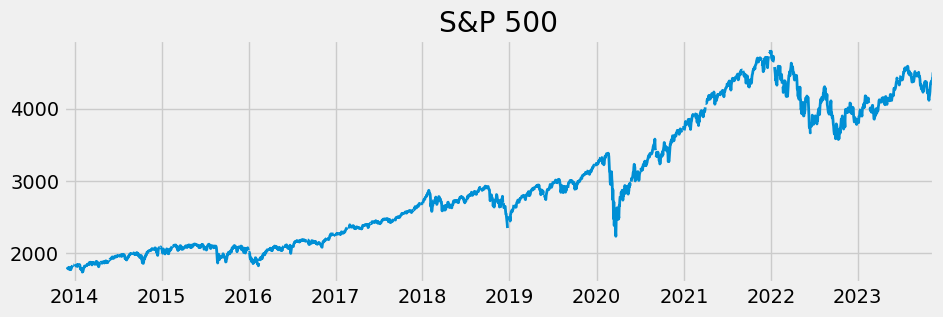

In [26]:
# Plot
SP500_Data.plot(figsize=(10,3),title='S&P 500',lw=2)

## **Pull & Merge Multiple Data Series**

In [28]:
Search_02 = data_source.search('unemployment',order_by='popularity').head(10)
Search_02

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-20,2023-11-20,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
CPIAUCSL,CPIAUCSL,2023-11-20,2023-11-20,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-10-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-11-14 07:52:02-06:00,94,The Consumer Price Index for All Urban Consume...
PAYEMS,PAYEMS,2023-11-20,2023-11-20,"All Employees, Total Nonfarm",1939-01-01,2023-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-11-03 07:52:02-05:00,81,"All Employees: Total Nonfarm, commonly known a..."
SAHMREALTIME,SAHMREALTIME,2023-11-20,2023-11-20,Real-time Sahm Rule Recession Indicator,1959-12-01,2023-10-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2023-11-14 09:40:01-06:00,81,Sahm Recession Indicator signals the start of ...
ICSA,ICSA,2023-11-20,2023-11-20,Initial Claims,1967-01-07,2023-11-11,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-11-16 07:34:02-06:00,81,An initial claim is a claim filed by an unempl...
CES0500000003,CES0500000003,2023-11-20,2023-11-20,"Average Hourly Earnings of All Employees, Tota...",2006-03-01,2023-10-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2023-11-03 07:52:02-05:00,78,The series comes from the 'Current Employment ...
CCSA,CCSA,2023-11-20,2023-11-20,Continued Claims (Insured Unemployment),1967-01-07,2023-11-04,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-11-16 07:34:02-06:00,75,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-11-20,2023-11-20,Unemployment Level,1948-01-01,2023-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-11-03 07:50:05-05:00,68,The series comes from the 'Current Population ...
NROU,NROU,2023-11-20,2023-11-20,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,67,"Starting with the July, 2021 report: An Update..."


In [29]:
UNRATE  = data_source.get_series(series_id='UNRATE')
UNRATE

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
Length: 910, dtype: float64

<Axes: >

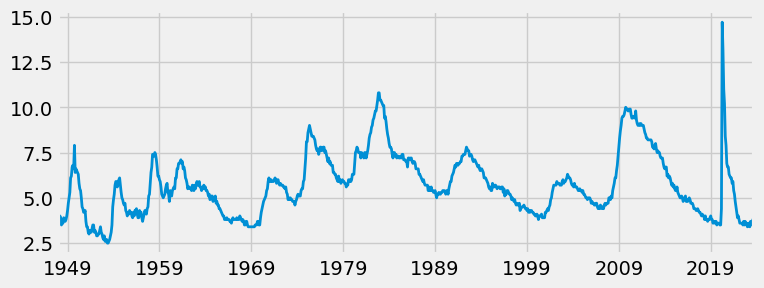

In [34]:
# Plot
UNRATE.plot(figsize=(8,3),lw=2)

In [60]:
Search_02 = data_source.search('unemployment rate state',order_by='popularity',filter=('frequency','Monthly'))
Search_02.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-20,2023-11-20,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
CPIAUCSL,CPIAUCSL,2023-11-20,2023-11-20,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-10-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-11-14 07:52:02-06:00,94,The Consumer Price Index for All Urban Consume...
PAYEMS,PAYEMS,2023-11-20,2023-11-20,"All Employees, Total Nonfarm",1939-01-01,2023-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-11-03 07:52:02-05:00,81,"All Employees: Total Nonfarm, commonly known a..."
SAHMREALTIME,SAHMREALTIME,2023-11-20,2023-11-20,Real-time Sahm Rule Recession Indicator,1959-12-01,2023-10-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2023-11-14 09:40:01-06:00,81,Sahm Recession Indicator signals the start of ...
CES0500000003,CES0500000003,2023-11-20,2023-11-20,"Average Hourly Earnings of All Employees, Tota...",2006-03-01,2023-10-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2023-11-03 07:52:02-05:00,78,The series comes from the 'Current Employment ...


In [61]:
print(Search_02.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"').shape)
Search_02 = Search_02.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')
Search_02

(166, 15)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-20,2023-11-20,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-11-20,2023-11-20,Unemployment Rate - Black or African American,1972-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:06-05:00,66,The series comes from the 'Current Population ...
USSLIND,USSLIND,2023-11-20,2023-11-20,Leading Index for the United States,1982-01-01,2020-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2020-04-14 09:16:10-05:00,65,The leading index for each state predicts the ...
U6RATE,U6RATE,2023-11-20,2023-11-20,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:12-05:00,63,The series comes from the 'Current Population ...
CAUR,CAUR,2023-11-20,2023-11-20,Unemployment Rate in California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:02-05:00,60,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUN25TTUSM156S,LRUN25TTUSM156S,2023-11-20,2023-11-20,Unemployment Rate: Aged 25-54: All Persons for...,1960-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:14-06:00,2,OECD Descriptor ID: LRUN25TT OECD unit ID: PC ...
LNS13023570,LNS13023570,2023-11-20,2023-11-20,New Entrants as a Percent of Total Unemployed,1967-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:51:21-05:00,2,The series comes from the 'Current Population ...
LNS14000150,LNS14000150,2023-11-20,2023-11-20,Unemployment Rate - Married Men,1955-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:51:16-05:00,2,The series comes from the 'Current Population ...


In [62]:
Search_02['title'].str.contains('Unemployment Rate').reset_index()

,series id,title
0,UNRATE,True
1,LNS14000006,True
2,USSLIND,False
3,U6RATE,False
4,CAUR,True
...,...,...
161,LRUN25TTUSM156S,True
162,LNS13023570,False
163,LNS14000150,True
164,FLSLIND,False


In [63]:
Search_02 = Search_02.loc[Search_02['title'].str.contains('Unemployment Rate')]
Search_02.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'LNS14000024',
       'TXUR', 'NYUR', 'FLUR', 'LNS14000002', 'U2RATE', 'LNS14000031',
       'LNS14000009', 'LNS14027660', 'LNS14000003', 'LNS14000001',
       'LNS14027662', 'LNS14024887', 'ALUR', 'COUR', 'OHUR', 'MIUR', 'PAUR',
       'MAUR', 'LNS14027659', 'GAUR', 'AZUR', 'WIUR', 'MNUR', 'NCUR', 'ILUR',
       'AKUR', 'IAUR', 'MDUR', 'ARUR', 'ORUR', 'VAUR', 'LNS14000012', 'NDUR',
       'NMUR', 'SCUR', 'MOUR', 'WAUR', 'LAUR', 'INUR', 'TNUR', 'HIUR', 'NVUR',
       'KYUR', 'WVUR', 'NJUR', 'UTUR', 'MTUR', 'LNS14032183', 'OKUR', 'CTUR',
       'LNS14000036', 'MSUR', 'LNS14000018', 'DCUR', 'DEUR', 'IDUR', 'NEUR',
       'MEUR', 'KSUR', 'NHUR', 'M0892BUSM156SNBR', 'LNS14000060', 'WYUR',
       'PRUR', 'RIUR', 'LRUN64TTUSM156S', 'LNS14000028', 'SDUR', 'VTUR',
       'CMWRUR', 'LNS14000032', 'CSOUUR', 'LNS14000089', 'LNS14200000',
       'LNS14027689', 'LASMT391746000000003', 'LNS14000025', 'LNS14024230',
       'CNERUR', 'LASMT26

In [64]:
Search_02

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-20,2023-11-20,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-11-20,2023-11-20,Unemployment Rate - Black or African American,1972-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:06-05:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2023-11-20,2023-11-20,Unemployment Rate in California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:02-05:00,60,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-11-20,2023-11-20,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
LNS14000024,LNS14000024,2023-11-20,2023-11-20,Unemployment Rate - 20 Yrs. & over,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:16-05:00,53,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CWSTUR,CWSTUR,2023-11-20,2023-11-20,Unemployment Rate in West Census Region,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:12-05:00,2,None
LRUNTTTTUSM156S,LRUNTTTTUSM156S,2023-11-20,2023-11-20,Unemployment Rate: Aged 15 and over: All Perso...,1960-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:14-06:00,2,OECD Descriptor ID: LRUNTTTT OECD unit ID: PC ...
LRUN25TTUSM156S,LRUN25TTUSM156S,2023-11-20,2023-11-20,Unemployment Rate: Aged 25-54: All Persons for...,1960-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:14-06:00,2,OECD Descriptor ID: LRUN25TT OECD unit ID: PC ...


In [70]:
# Get State Specific Unemployment
UR_State_List = []

for ID in Search_02.index:
    if len(ID) == 4:
        print('Downloading Data For: ',ID)
        UR_State_Data = data_source.get_series(series_id=ID).to_frame(name=ID)
        UR_State_List.append(UR_State_Data)
        

In [74]:
# Check Downloaded Data
print(type(UR_State_List))
print(len(UR_State_List))

UR_State_List[0:2]

<class 'list'>
52


[            CAUR
 1976-01-01   9.2
 1976-02-01   9.2
 1976-03-01   9.1
 1976-04-01   9.1
 1976-05-01   9.0
 ...          ...
 2023-05-01   4.5
 2023-06-01   4.6
 2023-07-01   4.6
 2023-08-01   4.6
 2023-09-01   4.7
 
 [573 rows x 1 columns],
             TXUR
 1976-01-01   5.8
 1976-02-01   5.8
 1976-03-01   5.9
 1976-04-01   5.9
 1976-05-01   5.9
 ...          ...
 2023-05-01   4.1
 2023-06-01   4.1
 2023-07-01   4.1
 2023-08-01   4.1
 2023-09-01   4.1
 
 [573 rows x 1 columns]]

In [75]:
UR_State_Data = pd.concat(UR_State_List,axis=1)
UR_State_Data.head()

,CAUR,TXUR,NYUR,FLUR,ALUR,COUR,OHUR,MIUR,PAUR,MAUR,...,IDUR,NEUR,MEUR,KSUR,NHUR,WYUR,PRUR,RIUR,SDUR,VTUR
1976-01-01,9.2,5.8,10.3,9.7,6.6,5.8,8.1,9.9,8.0,10.5,...,5.6,3.3,8.7,4.2,6.5,4.1,19.6,7.8,3.3,8.6
1976-02-01,9.2,5.8,10.3,9.7,6.6,5.7,8.1,9.9,8.1,10.5,...,5.6,3.3,8.7,4.2,6.5,4.1,19.5,7.8,3.3,8.6
1976-03-01,9.1,5.9,10.2,9.6,6.6,5.7,8.1,9.9,8.1,10.5,...,5.6,3.3,8.6,4.2,6.5,4.1,19.3,7.7,3.2,8.6
1976-04-01,9.1,5.9,10.2,9.5,6.5,5.6,8.0,9.8,8.1,10.3,...,5.6,3.2,8.6,4.2,6.5,4.0,19.0,7.7,3.1,8.6
1976-05-01,9.0,5.9,10.1,9.3,6.4,5.6,7.8,9.6,8.1,10.1,...,5.6,3.1,8.5,4.2,6.5,3.9,18.9,7.7,3.1,8.5


# **Data Preparation**

## **Data Cleaning**

In [85]:
# Check Row Wise Missing Values
UR_State_Data.isna().sum(axis=1)

1976-01-01    0
1976-02-01    0
1976-03-01    0
1976-04-01    0
1976-05-01    0
             ..
2023-05-01    0
2023-06-01    0
2023-07-01    0
2023-08-01    0
2023-09-01    0
Length: 573, dtype: int64

<Axes: >

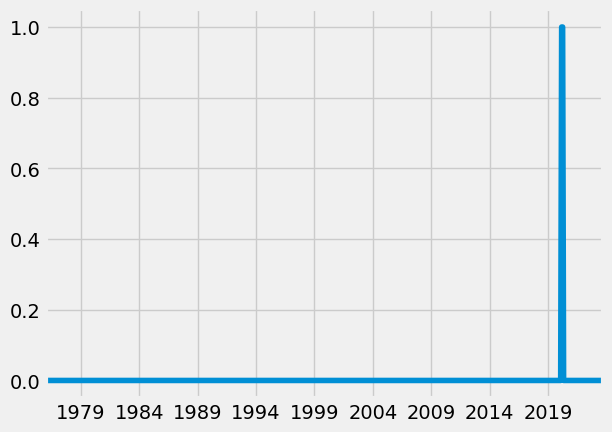

In [88]:
# Create A Plot
UR_State_Data.isna().sum(axis=1).plot(kind='line')

In [90]:
# Drop Missing Values
UR_State_Data.dropna(axis=0,inplace=True)
UR_State_Data.shape

(571, 52)

# **Data Visualization**

## **Create Line Plot**

In [92]:
px.line(UR_State_Data)

## **Apr-2020 Bar Plot**